In [19]:
%config InlineBackend.figure_format = 'retina'

# Task 1 

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing
import cma

### Defining the benchmark functions 

In [2]:
def rosenbrock_function(input_vector):
    """
    Rosenbrock function: A non-convex function used to test optimization methods.
    """
    return sum(100.0 * (input_vector[1:] - input_vector[:-1]**2.0)**2 + (1 - input_vector[:-1])**2)

def rastrigin_function(input_vector):
    """
    Rastrigin function: A highly multimodal function used for testing global optimization techniques.
    """
    return 10 * len(input_vector) + sum(input_vector**2 - 10 * np.cos(2 * np.pi * input_vector))

def ackley_function(input_vector):
    """
    Ackley function: A commonly used test function with many local minima.
    """
    dimension = len(input_vector)
    return -20 * np.exp(-0.2 * np.sqrt(sum(input_vector**2) / dimension)) \
           - np.exp(sum(np.cos(2 * np.pi * input_vector)) / dimension) + 20 + np.e


### Defining Optimization methods

In [3]:
def apply_optimization(target_function, optimization_method, search_bounds, num_dimensions=2):
    """
    Applies an optimization method to minimize a given function.
    
    Parameters:
    - target_function: The function to be minimized.
    - optimization_method: The chosen optimization algorithm.
    - search_bounds: The boundaries for search space.
    - num_dimensions: Number of dimensions in the search space.
    
    Returns:
    - optimized_params: The best parameters found.
    - optimized_value: The function value at the optimized parameters.
    - execution_time: Time taken for optimization.
    """
    start_time = time.time()
    
    if optimization_method == 'nelder-mead':
        result = minimize(target_function, x0=np.zeros(num_dimensions), method='Nelder-Mead', options={'maxiter': 5000})
    elif optimization_method == 'simulated-annealing':
        result = dual_annealing(target_function, bounds=search_bounds, maxiter=5000)
    elif optimization_method == 'cma-es':
        cma_optimizer = cma.CMAEvolutionStrategy(np.zeros(num_dimensions), 0.5)
        optimization_result = cma_optimizer.optimize(target_function, maxiter=5000).result
        result = {'x': optimization_result[0], 'fun': optimization_result[1]}
    else:
        raise ValueError("Unknown optimization method")
    
    execution_time = time.time() - start_time
    return result['x'], result['fun'], execution_time

num_dimensions = 2  #Number of dimensions for fn optimization
search_bounds = [(-5, 5)] * num_dimensions  #Search space bounds for opti`mization`
optimization_methods = ['nelder-mead', 'simulated-annealing', 'cma-es'] 

#benchmarks
benchmark_functions = {
    'Rosenbrock': rosenbrock_function,
    'Rastrigin': rastrigin_function,
    'Ackley': ackley_function
}

global_minima_values = {'Rosenbrock': 0, 'Rastrigin': 0, 'Ackley': 0}  # Known minimum values of functions

optimization_results = {}

for function_name, function in benchmark_functions.items():
    optimization_results[function_name] = {}
    for method in optimization_methods:
        best_parameters, best_function_value, time_taken = apply_optimization(function, method, search_bounds, num_dimensions)
        absolute_error = abs(best_function_value - global_minima_values[function_name])  # Compute error from the known minimum
        optimization_results[function_name][method] = {
            'params': best_parameters,
            'error': absolute_error,
            'time': time_taken
        }
        print(f"{function_name} - {method}: Error {absolute_error:.6f}, Time {time_taken:.2f}s")

Rosenbrock - nelder-mead: Error 0.000000, Time 0.00s
Rosenbrock - simulated-annealing: Error 0.000000, Time 1.86s
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=338806, Sat Mar 29 19:14:41 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 2.095436912385860e+00 1.0e+00 3.85e-01  3e-01  3e-01 0:00.0
    2     12 4.967833572999876e+00 1.2e+00 3.84e-01  3e-01  3e-01 0:00.0
    3     18 3.888358404185754e+00 1.6e+00 2.97e-01  2e-01  3e-01 0:00.0
  100    600 3.947746219537231e-07 5.8e+01 9.33e-02  7e-04  1e-03 0:00.0
  150    900 1.293083927886867e-15 6.6e+01 2.98e-04  4e-08  9e-08 0:00.0
Rosenbrock - cma-es: Error 0.000000, Time 0.08s
Rastrigin - nelder-mead: Error 0.000000, Time 0.00s


/Users/aryan/Desktop/Academics /Semester 4/Mathematical Foundations for AI/coding1_assignment_cs303/venv/lib/python3.10/site-packages/cma/interfaces.py:188: UserWarning: ignoring unkown argument {'maxiter': 5000} in OOOptimizer.optimize
  warnings.warn(


Rastrigin - simulated-annealing: Error 0.000000, Time 0.75s
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=403198, Sat Mar 29 19:14:42 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 3.736215337107311e+00 1.0e+00 4.21e-01  3e-01  4e-01 0:00.0
    2     12 1.775272894932810e+01 1.3e+00 4.27e-01  3e-01  5e-01 0:00.0
    3     18 7.291935789465954e+00 1.7e+00 3.03e-01  2e-01  3e-01 0:00.0
   86    516 0.000000000000000e+00 1.4e+00 3.30e-06  2e-09  2e-09 0:00.0
Rastrigin - cma-es: Error 0.000000, Time 0.04s
Ackley - nelder-mead: Error 0.000000, Time 0.00s
Ackley - simulated-annealing: Error 0.000000, Time 3.44s
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=427324, Sat Mar 29 19:14:45 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 8.152217192103040e-02 1.0e+00 3.89e-01  3e-01  4e-01 0:00.0
    2     12 1.487682158003868e+00 1.1e+00 3.39e-01  3e-01  3e-01 0:00.0
    3     18 1.2968720704

### Visualization

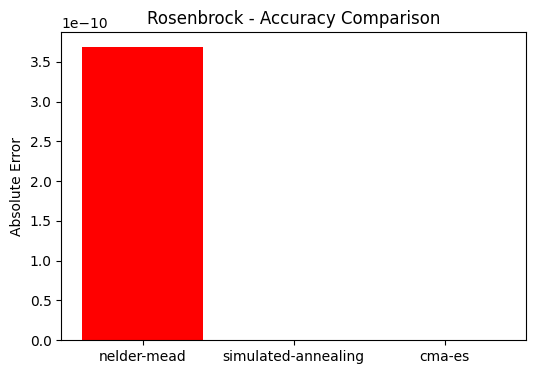

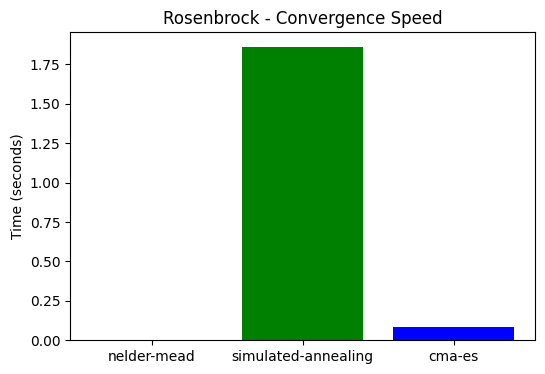

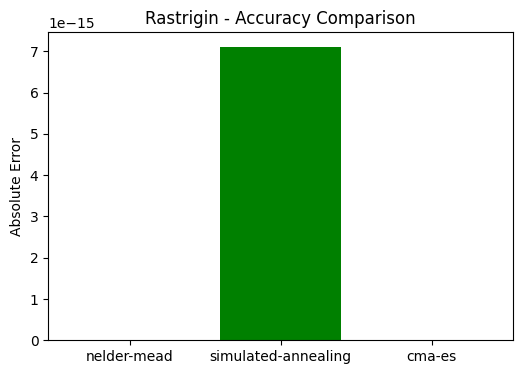

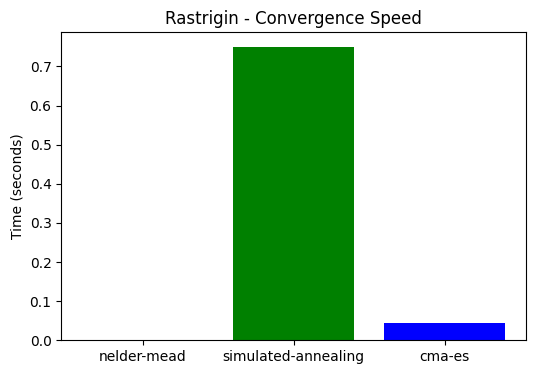

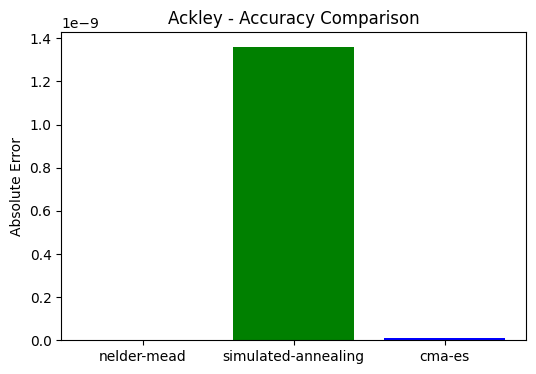

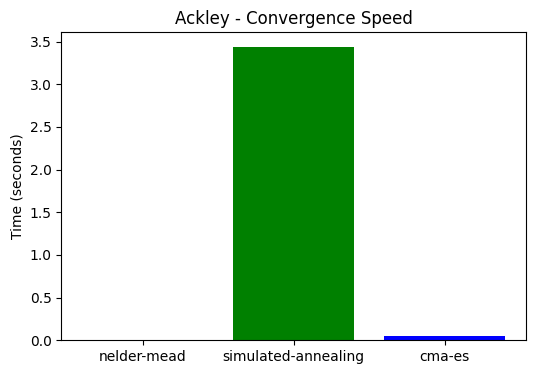

In [8]:
def plot_comparison(function_name, metric_key, y_axis_label, plot_title):
    """
    Plots a bar chart comparing optimization methods based on a given metric.
    
    Parameters:
    - function_name: The name of the function being optimized.
    - metric_key: The metric to plot ('error' or 'time').
    - y_axis_label: Label for the Y-axis.
    - plot_title: Title of the plot.
    """
    plt.figure(figsize=(6, 4))
    metric_values = [optimization_results[function_name][method][metric_key] for method in optimization_methods]
    plt.bar(optimization_methods, metric_values, color=['red', 'green', 'blue'])
    plt.ylabel(y_axis_label)
    plt.title(f"{function_name} - {plot_title}")
    plt.show()

for function_name in benchmark_functions.keys():
    plot_comparison(function_name, 'error', 'Absolute Error', 'Accuracy Comparison')
    plot_comparison(function_name, 'time', 'Time (seconds)', 'Convergence Speed')


# Task 2

In [9]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing
import cma
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Loading MNIST

In [10]:
mnist_data = fetch_openml('mnist_784', version=1)
features, labels = mnist_data.data.astype(np.float32) / 255.0, mnist_data.target.astype(int)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features[:5000], labels[:5000], test_size=0.2, random_state=42)

### Defining SVM

In [14]:
train_size = 400
test_size = 100
#80-20 split, smaller dataset for faster computation

In [13]:
def evaluate_svm(hyperparams):
    reg_param, kernel_scale = 10**hyperparams[0], 10**hyperparams[1]
    classifier = SVC(C=reg_param, gamma=kernel_scale, kernel='rbf')
    
    classifier.fit(X_train[:train_size], y_train[:train_size])
    predictions = classifier.predict(X_test[:test_size])
    
    # Return negative accuracy since optimization minimizes the function
    return -accuracy_score(y_test[:test_size], predictions)

### Function for HP optimization 

In [15]:
def optimize_hyperparameters(algorithm, num_runs=3):
    search_bounds = [(-3, 3), (-3, 3)]  #Bounds for log10 of C and gamma
    accuracies, times, eval_counts = [], [], []
    
    for _ in range(num_runs):
        start_time = time.time()
        evaluation_counter = 0
        
        #Wrapper function to count function evaluations
        def count_evaluations(hyperparams):
            nonlocal evaluation_counter
            evaluation_counter += 1
            return evaluate_svm(hyperparams)
        
        #Select the optimization algorithm
        if algorithm == 'nelder-mead':
            result = minimize(count_evaluations, x0=[0, 0], method='Nelder-Mead', options={'maxiter': 50})
        elif algorithm == 'simulated-annealing':
            result = dual_annealing(count_evaluations, bounds=search_bounds, maxiter=50)
        elif algorithm == 'cma-es':
            evolution_strategy = cma.CMAEvolutionStrategy([0, 0], 0.5)
            result = evolution_strategy.optimize(count_evaluations).result
            result = {'x': result[0], 'fun': result[1]}
        else:
            raise ValueError("Unknown optimization algorithm")
        
        elapsed_time = time.time() - start_time
        accuracies.append(-result['fun'])  # Convert back to positive accuracy
        times.append(elapsed_time)
        eval_counts.append(evaluation_counter)
    
    avg_accuracy = np.mean(accuracies)
    print(f"{algorithm} optimization completed: Average Accuracy = {avg_accuracy:.4f}")
    
    return {
        'accuracy_mean': avg_accuracy,
        'accuracy_std': np.std(accuracies),
        'time_mean': np.mean(times),
        'evaluations_mean': np.mean(eval_counts)
    }

### Computation 

In [16]:
optimization_methods = ['nelder-mead', 'simulated-annealing', 'cma-es']
results = {method: optimize_hyperparameters(method) for method in optimization_methods}

nelder-mead optimization completed: Average Accuracy = 0.1000
simulated-annealing optimization completed: Average Accuracy = 0.9100
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=356527, Sat Mar 29 19:22:33 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -1.200000000000000e-01 1.0e+00 4.35e-01  4e-01  4e-01 0:00.3
    2     12 -1.200000000000000e-01 1.0e+00 4.02e-01  3e-01  3e-01 0:00.6
    3     18 -1.500000000000000e-01 1.0e+00 4.05e-01  3e-01  4e-01 0:00.8
   18    108 -9.100000000000000e-01 2.1e+00 3.64e-01  8e-02  2e-01 0:03.9
   20    120 -9.100000000000000e-01 2.6e+00 3.27e-01  7e-02  1e-01 0:04.3
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=392105, Sat Mar 29 19:22:37 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 -1.000000000000000e-01 1.0e+00 4.43e-01  4e-01  4e-01 0:00.3
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=403634, Sat Mar 29 19:22:37 2025)
Iterat #Fe

### Plots

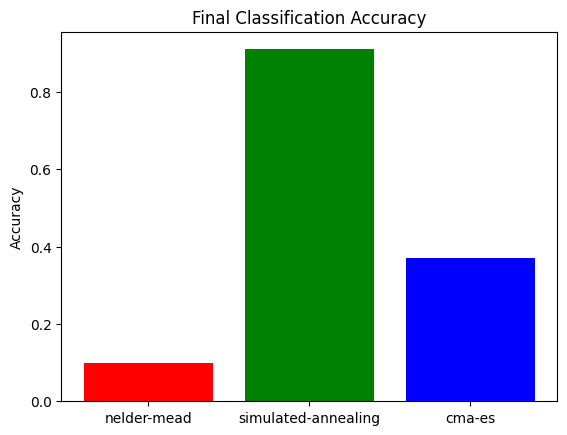

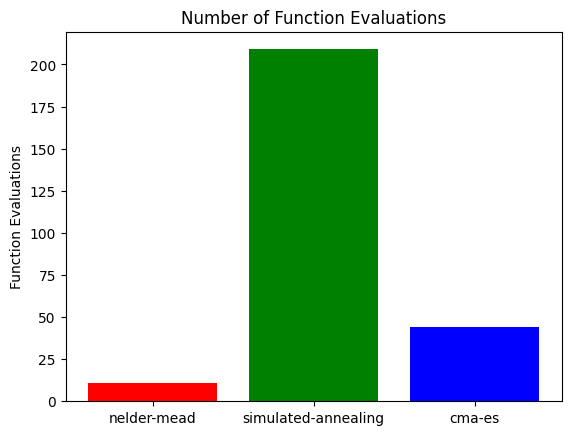

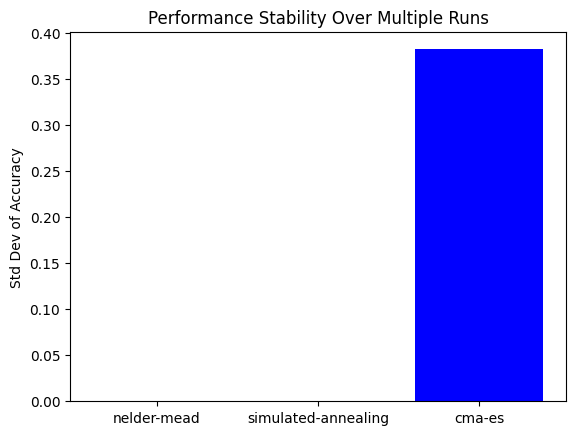

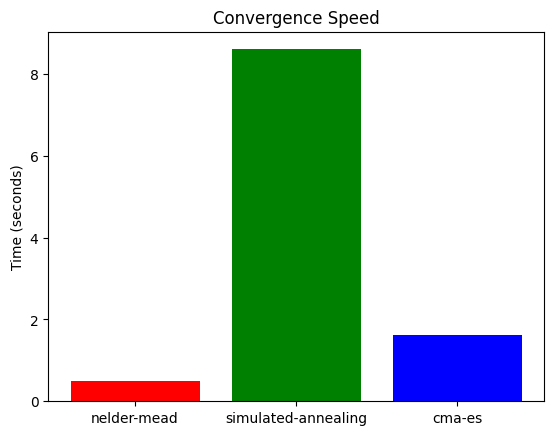

In [18]:
def plot_comparison(metric_key, y_label, chart_title):
    metric_values = [results[method][metric_key] for method in optimization_methods]
    plt.bar(optimization_methods, metric_values, color=['red', 'green', 'blue'])
    plt.ylabel(y_label)
    plt.title(chart_title)
    plt.show()

plot_comparison('accuracy_mean', 'Accuracy', 'Final Classification Accuracy')
plot_comparison('evaluations_mean', 'Function Evaluations', 'Number of Function Evaluations')
plot_comparison('accuracy_std', 'Std Dev of Accuracy', 'Performance Stability Over Multiple Runs')
plot_comparison('time_mean', 'Time (seconds)', 'Convergence Speed')


# Task 3

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, dual_annealing
import cma
from mpl_toolkits.mplot3d import Axes3D

### Optimizations 

In [21]:
def rosenbrock(x):
    x = np.array(x)
    return sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

bounds = [(-2, 2), (-2, 2)]
initial_points = [np.random.uniform(-2, 2, 2) for _ in range(5)]

trajectories = {}
final_solutions = {}

In [22]:
# Nelder-Mead Optimization
for i, x0 in enumerate(initial_points):
    res = minimize(rosenbrock, x0, method='Nelder-Mead', options={'return_all': True})
    trajectories[f'Nelder-Mead-{i}'] = np.array(res.allvecs)
    final_solutions[f'Nelder-Mead-{i}'] = res.x

# Simulated Annealing Optimization
def sa_callback(x, f, context):
    sa_traj.append(np.copy(x))

for i, x0 in enumerate(initial_points):
    sa_traj = []
    result = dual_annealing(rosenbrock, bounds, callback=sa_callback)
    trajectories[f'SA-{i}'] = np.array(sa_traj)
    final_solutions[f'SA-{i}'] = result.x

# CMA-ES Optimization
for i, x0 in enumerate(initial_points):
    es = cma.CMAEvolutionStrategy(x0, 0.5)
    cma_traj = []
    while not es.stop():
        solutions = es.ask()
        es.tell(solutions, [rosenbrock(x) for x in solutions])
        cma_traj.append(es.best.x)
    trajectories[f'CMA-ES-{i}'] = np.array(cma_traj)
    final_solutions[f'CMA-ES-{i}'] = es.best.x

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=373565, Sat Mar 29 19:28:42 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=325687, Sat Mar 29 19:28:42 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=335988, Sat Mar 29 19:28:42 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=364239, Sat Mar 29 19:28:42 2025)
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=310946, Sat Mar 29 19:28:42 2025)


### Plots 

In [26]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',

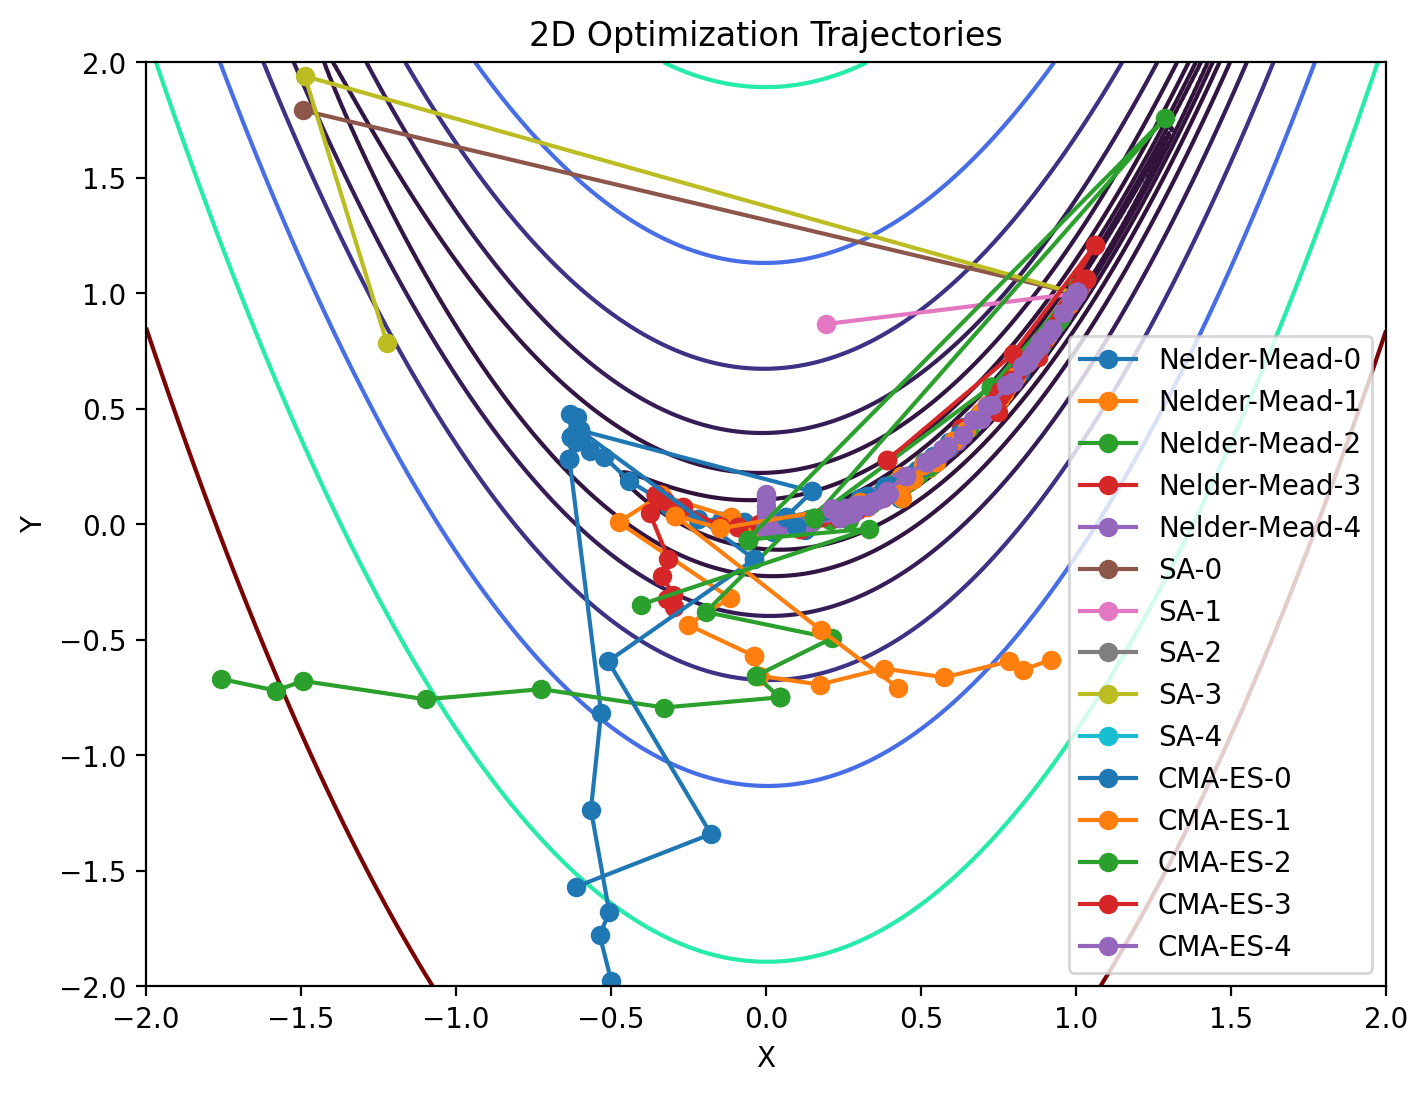

In [27]:
#2D Trajectory Plot
plt.figure(figsize=(8, 6))
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = np.array([rosenbrock([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())]).reshape(X.shape)
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10), cmap='turbo')

for key, traj in trajectories.items():
    plt.plot(traj[:, 0], traj[:, 1], marker='o', label=key)
plt.legend()
plt.title('2D Optimization Trajectories')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

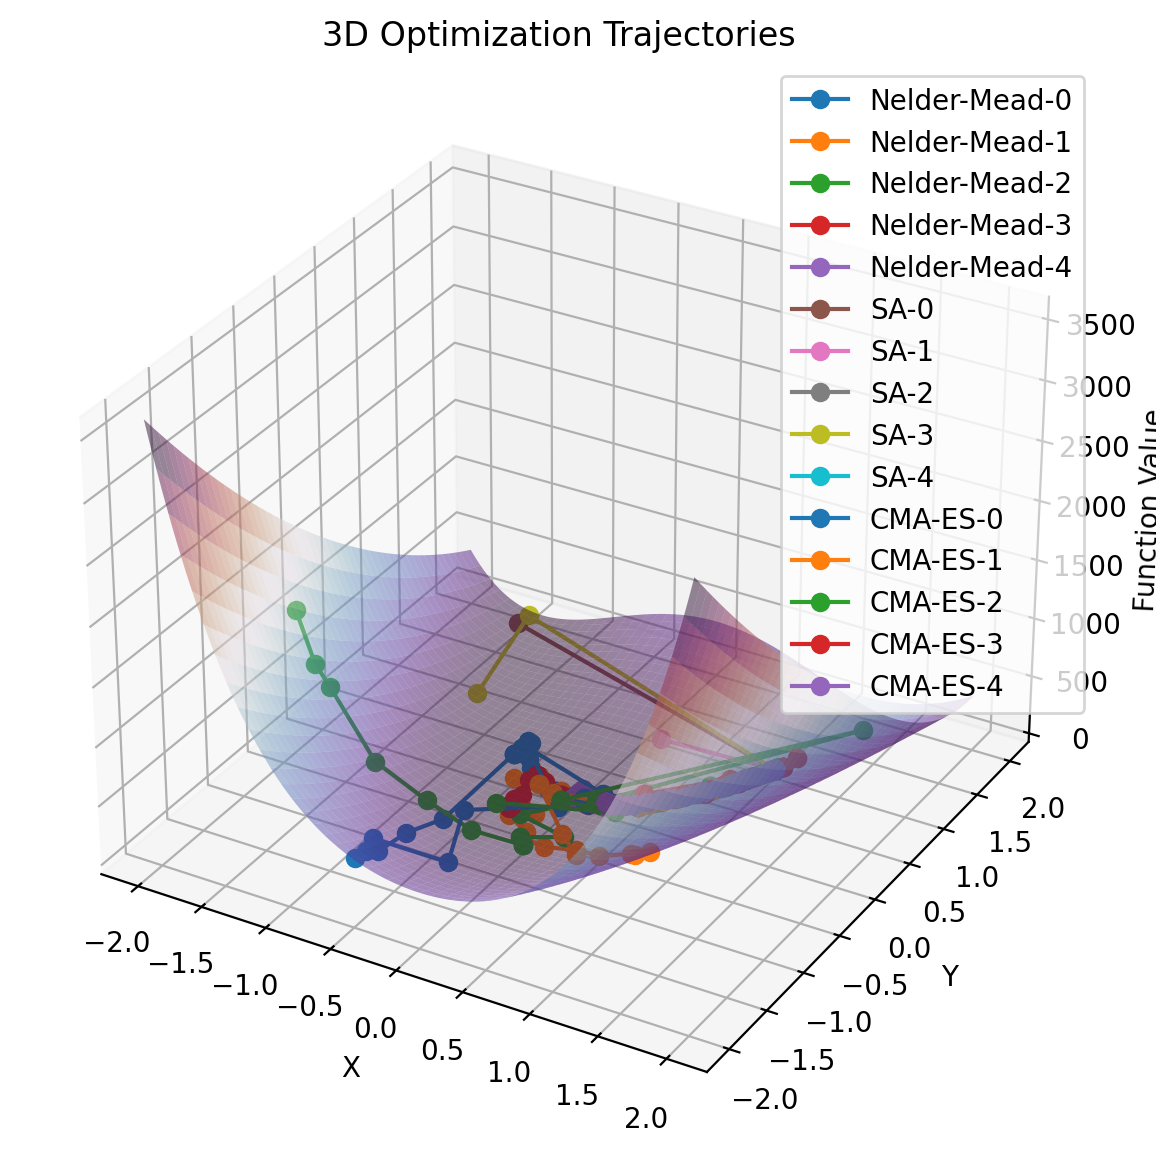

In [28]:
#3D Trajectory Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='twilight_shifted', alpha=0.5)

for key, traj in trajectories.items():
    ax.plot(traj[:, 0], traj[:, 1], [rosenbrock(p) for p in traj], marker='o', label=key)

ax.set_title('3D Optimization Trajectories')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Function Value')
plt.legend()
plt.show()

/var/folders/r4/6gw7r2mj0t5g7qss7k7160940000gn/T/ipykernel_54480/33144710.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(function_evals.values(), labels=function_evals.keys(), patch_artist=True,


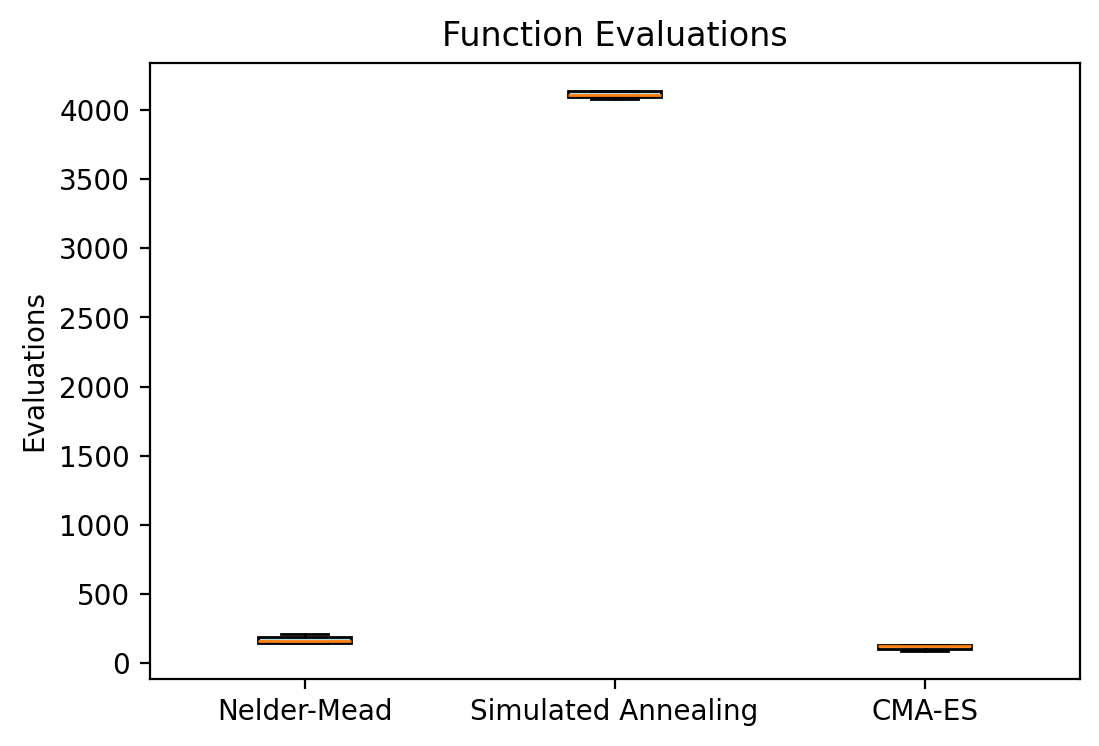

/var/folders/r4/6gw7r2mj0t5g7qss7k7160940000gn/T/ipykernel_54480/33144710.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(final_values.values(), labels=final_values.keys(), patch_artist=True,


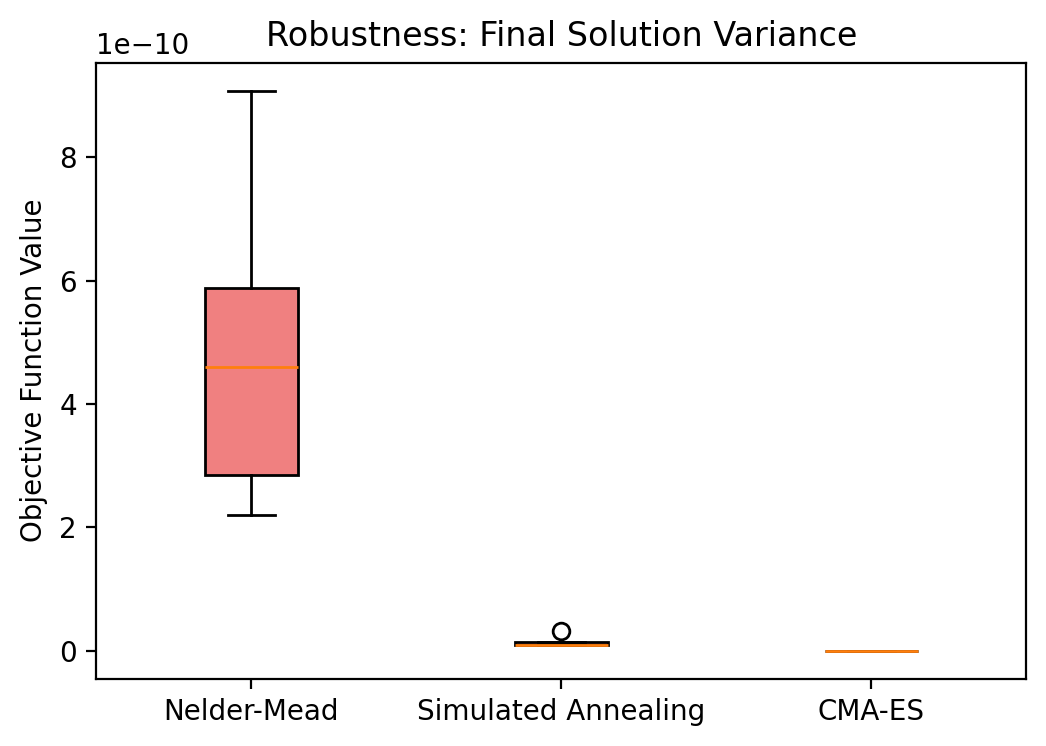

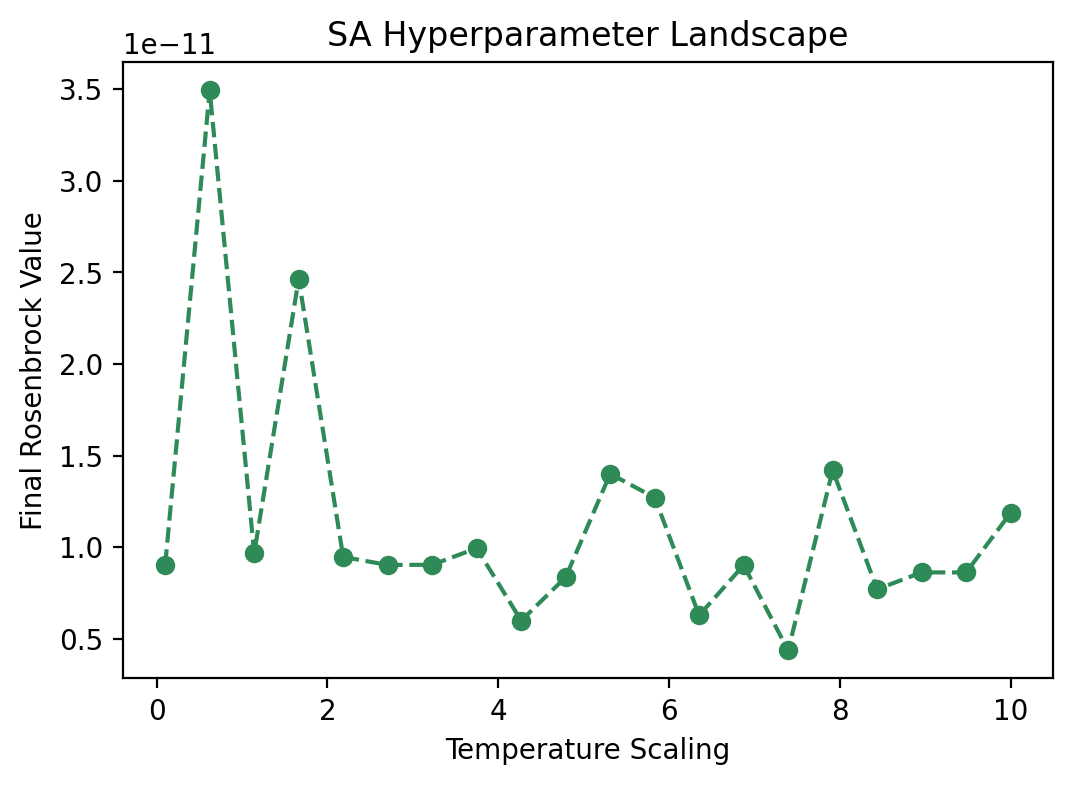

In [ ]:
#Function Evaluations
function_evals = {
    'Nelder-Mead': [minimize(rosenbrock, x0, method='Nelder-Mead').nfev for x0 in initial_points],
    'Simulated Annealing': [dual_annealing(rosenbrock, bounds).nfev for _ in initial_points],
    'CMA-ES': [len(trajectories[f'CMA-ES-{i}']) for i in range(5)]
}

plt.figure(figsize=(6, 4))
plt.boxplot(function_evals.values(), labels=function_evals.keys(), patch_artist=True, 
            boxprops=dict(facecolor='lightblue'))
plt.title('Function Evaluations')
plt.ylabel('Evaluations')
plt.show()

#Final Objective Values
final_values = {
    'Nelder-Mead': [rosenbrock(final_solutions[f'Nelder-Mead-{i}']) for i in range(5)],
    'Simulated Annealing': [rosenbrock(final_solutions[f'SA-{i}']) for i in range(5)],
    'CMA-ES': [rosenbrock(final_solutions[f'CMA-ES-{i}']) for i in range(5)]
}

plt.figure(figsize=(6, 4))
plt.boxplot(final_values.values(), labels=final_values.keys(), patch_artist=True, 
            boxprops=dict(facecolor='lightcoral'))
plt.title('Robustness: Final Solution Variance')
plt.ylabel('Objective Function Value')
plt.show()

#Simulated Annealing Hyperparameter Landscape
temps = np.linspace(0.1, 10, 20)
sa_performance = [dual_annealing(rosenbrock, bounds, maxfun=int(temp * 100)).fun for temp in temps]

plt.figure(figsize=(6, 4))
plt.plot(temps, sa_performance, marker='o', color='seagreen', linestyle='--')
plt.xlabel('Temperature Scaling')
plt.ylabel('Final Rosenbrock Value')
plt.title('SA Hyperparameter Landscape')
plt.show()